In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/39/29/89572cb0c65b07a1c4e5cd53eb0a0f947f2ece53fef6ed7da90cfab7d2a9/yfinance-0.2.43-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
      --------------------------------------- 0.1/3.0 MB 544.7 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 655.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)

stock = 'GOOG'

df = yf.download(stock, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-09-29,12.441616,12.447095,12.279224,12.416709,12.386291,84282733
2009-09-30,12.453322,12.456809,12.135513,12.349959,12.319705,126139035
2009-10-01,12.278975,12.365401,12.129536,12.134517,12.104790,112949783
2009-10-02,12.048340,12.247593,12.019946,12.069261,12.039694,104421937
2009-10-05,12.145725,12.264779,12.038377,12.167394,12.137586,86105539
...,...,...,...,...,...,...
2024-09-23,165.339996,166.610001,162.949997,163.070007,163.070007,15648400
2024-09-24,164.250000,164.550003,162.029999,163.639999,163.639999,18774100
2024-09-25,162.970001,164.216995,162.774994,162.990005,162.990005,13607900


In [4]:
df.shape

(3775, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2009-09-29 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3775 non-null   float64
 1   High       3775 non-null   float64
 2   Low        3775 non-null   float64
 3   Close      3775 non-null   float64
 4   Adj Close  3775 non-null   float64
 5   Volume     3775 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.4 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3.775000e+03
mean,58.596065,59.205039,58.024069,58.624545,58.485725,5.457046e+07
std,45.231080,45.742924,44.774362,45.257852,45.158791,4.934098e+07
min,10.916831,11.015710,10.800268,10.861040,10.834433,1.584340e+05
25%,21.800412,21.916352,21.678992,21.818219,21.764768,2.445300e+07
50%,41.692501,41.907501,41.451801,41.762001,41.659695,3.442000e+07
75%,88.126751,89.058750,87.160252,88.164253,87.948269,7.373133e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,5.952147e+08


In [7]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

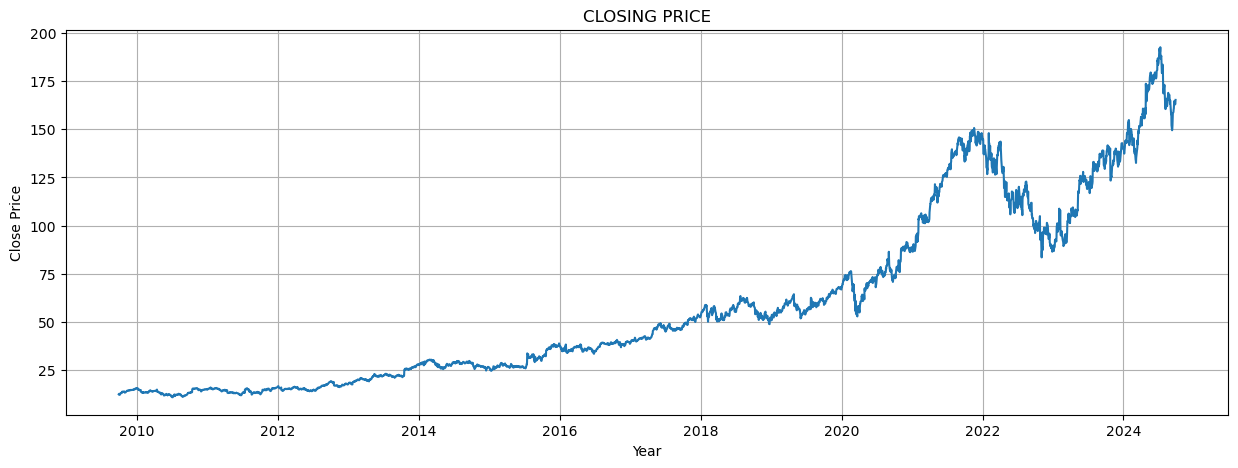

In [8]:
plt.figure(figsize = (15,5))
plt.plot(df['Close'])
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.title("CLOSING PRICE")
plt.grid(True)
plt.show()

In [9]:
ma100 = df.Close.rolling(100).mean()


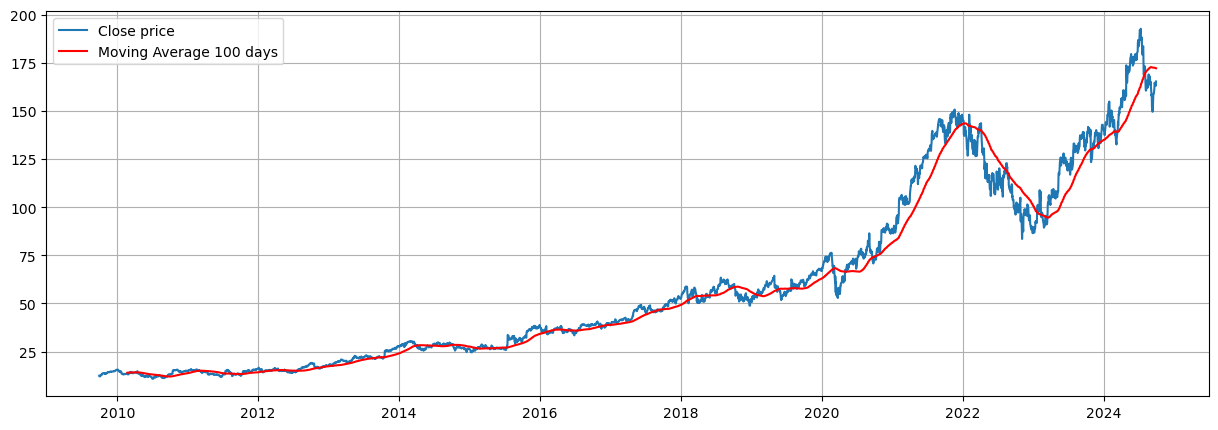

In [10]:
plt.figure(figsize = (15,5))
plt.plot(df.Close, label='Close price')
plt.plot(ma100,'r', label= 'Moving Average 100 days')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
ma200 = df.Close.rolling(200).mean()

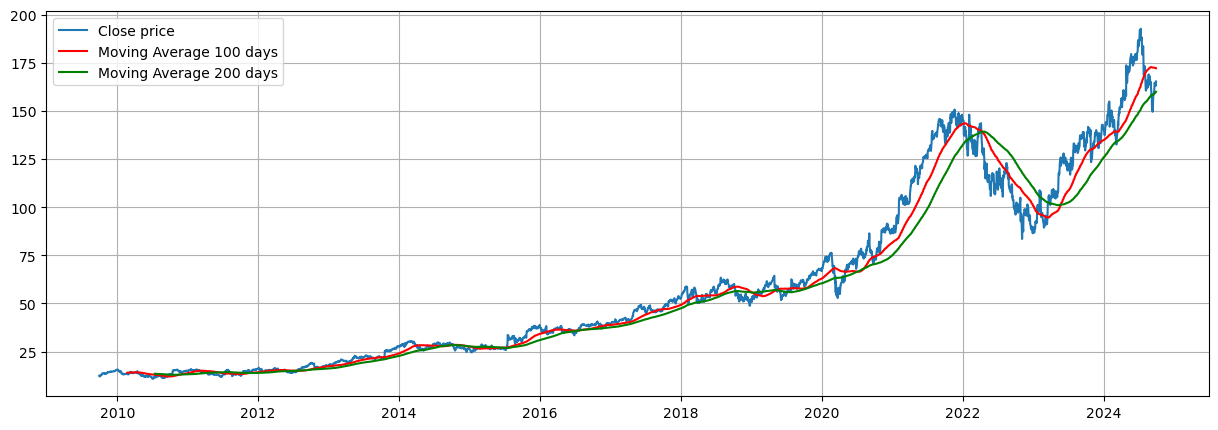

In [12]:
plt.figure(figsize = (15,5))
plt.plot(df.Close, label='Close price')
plt.plot(ma100,'r', label= 'Moving Average 100 days')
plt.plot(ma200,'g', label= 'Moving Average 200 days')
plt.legend()
plt.grid(True)
plt.show()

# Scale Data

In [13]:
Close_price = df['Close']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


scaled_data = scaler.fit_transform(Close_price.values.reshape(-1,1))
scaled_data

array([[0.00855708],
       [0.00818992],
       [0.00700486],
       ...,
       [0.83679776],
       [0.84141823],
       [0.84944903]])

In [15]:
len(scaled_data)

3775

In [16]:
x_data = []
y_data = []

for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data) , np.array(y_data)

In [17]:
x_data[0], y_data[0]

(array([[0.00855708],
        [0.00818992],
        [0.00700486],
        [0.00664592],
        [0.0071857 ],
        [0.00858586],
        [0.01116147],
        [0.01070115],
        [0.01098474],
        [0.01205198],
        [0.01233557],
        [0.01359735],
        [0.01285618],
        [0.01558797],
        [0.01589486],
        [0.01584417],
        [0.01575923],
        [0.01616886],
        [0.01611406],
        [0.0161853 ],
        [0.01537426],
        [0.01427962],
        [0.01575238],
        [0.01370695],
        [0.01341514],
        [0.01386724],
        [0.01428373],
        [0.01542357],
        [0.01575923],
        [0.01732241],
        [0.01790466],
        [0.01842527],
        [0.018054  ],
        [0.0186294 ],
        [0.01920891],
        [0.01937469],
        [0.0192596 ],
        [0.01875818],
        [0.01834307],
        [0.02004051],
        [0.02014189],
        [0.02050494],
        [0.01968568],
        [0.02012956],
        [0.02107076],
        [0

# Splitting data

In [18]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2572, 100, 1)
(2572, 1)
(1103, 100, 1)
(1103, 1)


In [20]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 128, return_sequences =True, input_shape = (x_train.shape[1], 1 )))
model.add(LSTM(units = 64, return_sequences =False))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - loss: 0.0025
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 5.2941e-05
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 5.5005e-05
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 9.3200e-05
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 4.7582e-05
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 5.0473e-05
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 5.0000e-05
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 4.3755e-05
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 4.0536e-05
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 3.9678e-05


# Predictions

In [24]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


In [25]:
predictions

array([[0.31688425],
       [0.31947902],
       [0.32045248],
       ...,
       [0.814401  ],
       [0.81945324],
       [0.82322526]], dtype=float32)

In [26]:
y_test

array([[0.31862647],
       [0.31136294],
       [0.31323316],
       ...,
       [0.83679776],
       [0.84141823],
       [0.84944903]])

In [27]:
# reshape y_predicted to have 2D
predictions = predictions.reshape(-1,1)
y_test = y_test.reshape(-1, 1)

In [28]:
# need to scale up to understand the predictions and y_test
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 68.47027 ],
       [ 68.94199 ],
       [ 69.118965],
       ...,
       [158.91829 ],
       [159.83679 ],
       [160.52254 ]], dtype=float32)

In [29]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 68.78700256],
       [ 67.46649933],
       [ 67.8065033 ],
       ...,
       [162.99000549],
       [163.83000183],
       [165.28999329]])

In [30]:
inv_predictions.shape


(1103, 1)

In [31]:
inv_y_test.shape

(1103, 1)

In [32]:
# calculate RMSE performance metrics
rmse = np.sqrt(np.mean(inv_predictions[:len(inv_y_test)] - inv_y_test)**2)
rmse

1.5743191564288446

In [33]:
ploting_data = pd.DataFrame(
    {
      "Date": df.index[splitting_len+100:],
     "Actual": inv_y_test.reshape(-1),
     "Predicted":inv_predictions.reshape(-1)[:len(inv_y_test)]
    }
)
ploting_data

,Date,Actual,Predicted
0,2020-05-12,68.787003,68.470268
1,2020-05-13,67.466499,68.941994
2,2020-05-14,67.806503,69.118965
3,2020-05-15,68.659500,69.131493
4,2020-05-18,69.196999,69.127449
...,...,...,...
1098,2024-09-23,163.070007,156.070786
1099,2024-09-24,163.639999,157.625900
1100,2024-09-25,162.990005,158.918289
1101,2024-09-26,163.830002,159.836792


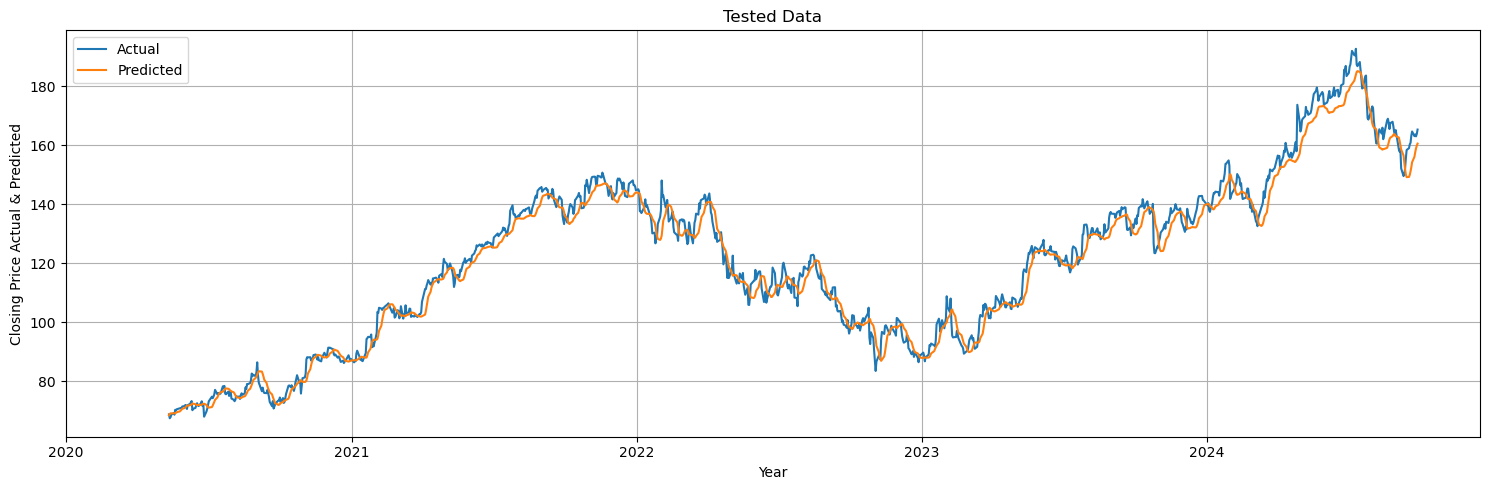

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

ploting_data['Date'] = pd.to_datetime(ploting_data['Date'])
unique_years = ploting_data['Date'].dt.year.unique()


plt.figure(figsize=(15, 5))
plt.plot(ploting_data['Date'], ploting_data['Actual'], label='Actual')
plt.plot(ploting_data['Date'], ploting_data['Predicted'], label='Predicted')
plt.xlabel("Year")
plt.ylabel("Closing Price Actual & Predicted")
plt.title("Tested Data")
plt.xticks(ticks=pd.to_datetime(unique_years.astype(str)), labels=unique_years)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Prediction For The Next 30 Days

In [35]:
# Get the last 100 days closing price
last_100_days = scaled_data[-100:]

# Reshape to fit the model
last_100_days = last_100_days.reshape(1, 100, 1)

# Make the prediction for the next 30 days
prediction_30_days = []
for i in range(30):
  next_day_pred = model.predict(last_100_days)
  prediction_30_days.append(next_day_pred)
  last_100_days = np.append(last_100_days[:,1:,:], next_day_pred.reshape(1,1,1), axis=1) # last_100_days[:,1:,:] This selects all data from last_100_days except for the first day.

# Inverse scaling to get the actual price
prediction_30_days = np.array(prediction_30_days)
prediction_30_days = prediction_30_days.reshape(-1, 1)
prediction_30_days = scaler.inverse_transform(prediction_30_days)

# Create a date range for the next 30 days
last_date = df.index[-1]
next_30_days = pd.date_range(last_date + pd.DateOffset(days=1), periods=30)

# Create a DataFrame for plotting
plotting_data_30 = pd.DataFrame({
    "Date": next_30_days,
    "Predicted": prediction_30_days.reshape(-1)
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

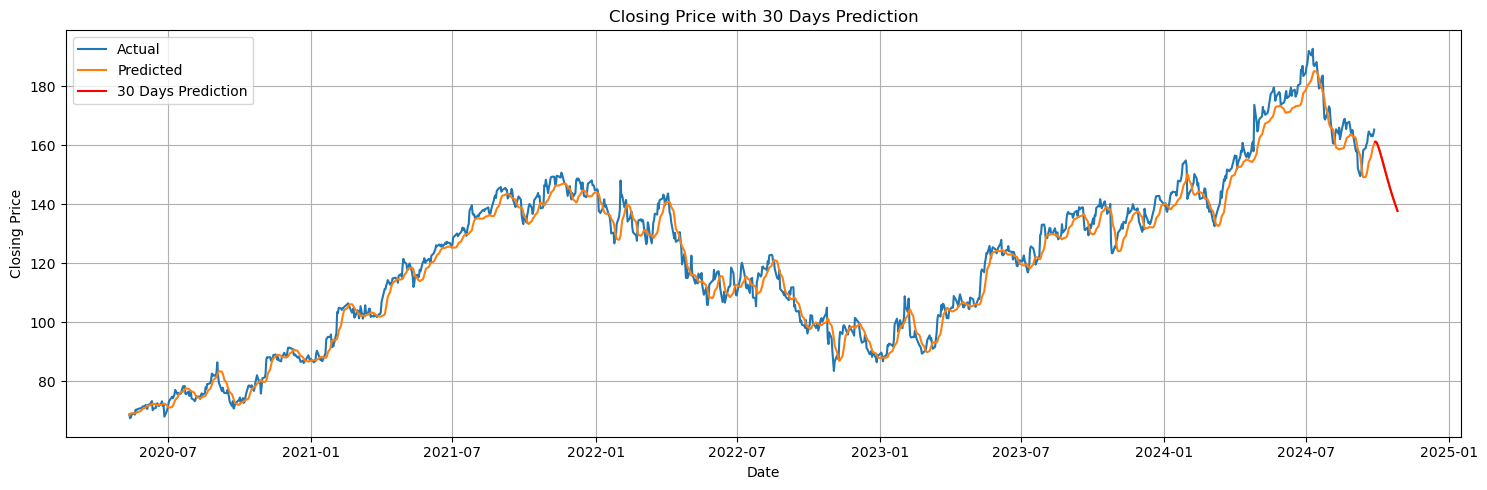

In [36]:
# Concatenate the two DataFrames
plotting_data_all = pd.concat([ploting_data, plotting_data_30])

# Convert 'Date' column to datetime
plotting_data_all['Date'] = pd.to_datetime(plotting_data_all['Date'])

# Plotting the combined data
plt.figure(figsize=(15, 5))

# Plotting 'Actual' from ploting_data
plt.plot(ploting_data['Date'], ploting_data['Actual'], label='Actual')

# Plotting 'Predicted' from both DataFrames
plt.plot(plotting_data_all['Date'], plotting_data_all['Predicted'], label='Predicted')

# Plotting the 30 days prediction with a different color
plt.plot(plotting_data_30['Date'], plotting_data_30['Predicted'], label='30 Days Prediction', color='red')


plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price with 30 Days Prediction")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

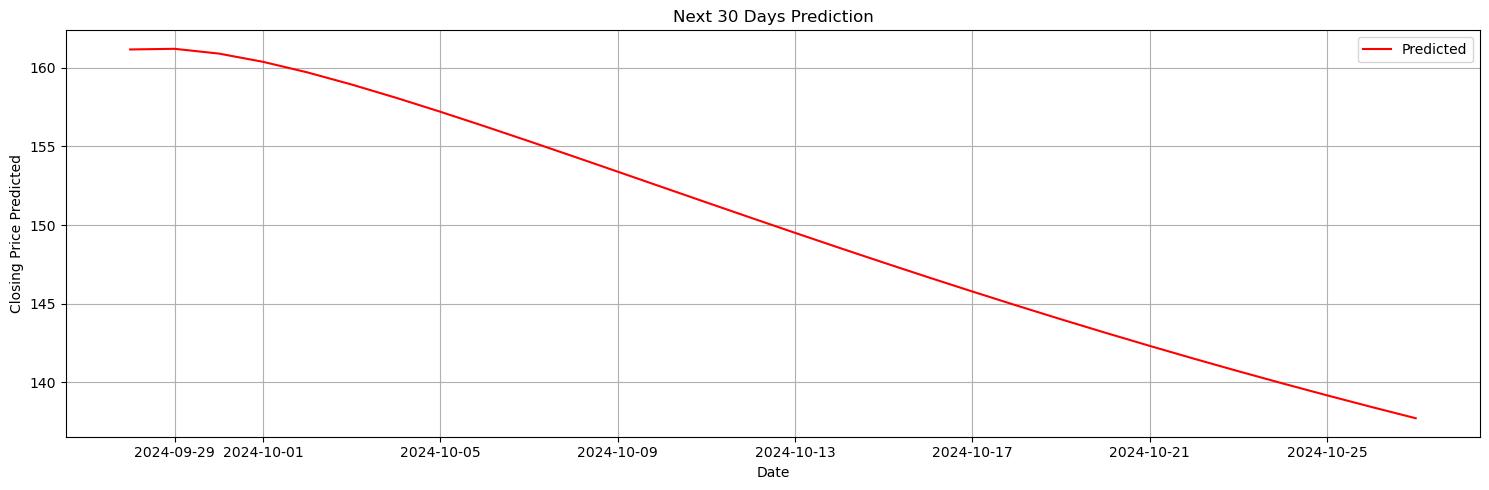

In [37]:
# Plotting the prediction for the next 30 days
plt.figure(figsize=(15, 5))
plt.plot(plotting_data_30['Date'], plotting_data_30['Predicted'], label='Predicted',color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price Predicted")
plt.title("Next 30 Days Prediction")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [38]:
model.save("stock_future_prediction_saved.keras")